In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV


In [3]:
# Load the data
file_path = r'C:\Users\eissa\dd\source code\Full_clustered_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head()

,patient_label,hip_knee_angle,knee_ankle_angle,hip_knee_angle_r,knee_ankle_angle_r,left_shoulder_elbow_angle,left_elbow_wrist_angle,right_shoulder_elbow_angle,right_elbow_wrist_angle,Target
0,OAW01-bottom,100.617182,89.490668,79.066984,103.316816,84.065700,78.285235,112.684778,102.451913,0
1,OAW01-bottom,101.571657,91.298998,78.928803,110.164716,80.677259,82.082049,112.253828,102.499115,0
2,OAW01-bottom,101.903664,94.777712,77.878505,116.895911,79.217586,85.281872,111.248798,102.271423,0
3,OAW01-bottom,102.051940,97.171604,78.653020,115.105438,78.933753,86.116666,109.465157,101.082634,0
4,OAW01-bottom,102.586880,99.157460,80.071540,102.232837,78.902353,85.511526,108.892788,99.226450,0


In [4]:
# Selecting multiple features
X = data[['hip_knee_angle', 'knee_ankle_angle', 'hip_knee_angle_r', 'knee_ankle_angle_r', 'left_shoulder_elbow_angle', 'left_elbow_wrist_angle', 'right_shoulder_elbow_angle', 'right_elbow_wrist_angle']]
y = data['Target']


In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Training the model with multiple features
rf_classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Calculating the accuracy of the model with multiple features
Random_Forest = accuracy_score(y_test, y_pred)

print("Accuracy of Random Forest:", round(Random_Forest,2),"%")

Accuracy of Random Forest: 0.89 %


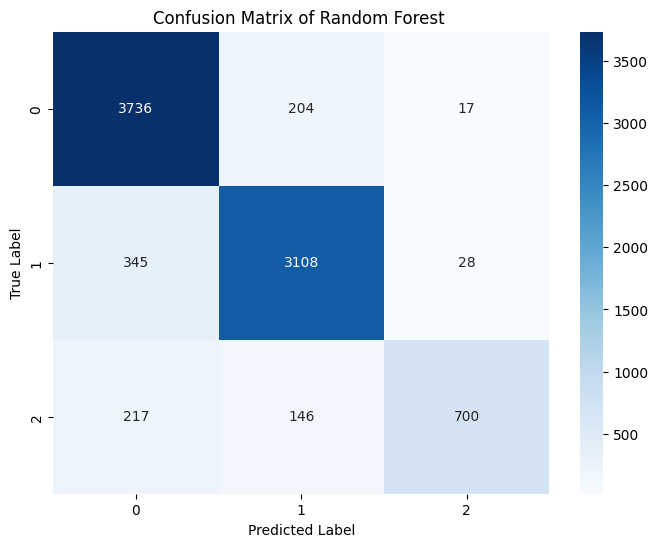

Precision: 0.89
Recall: 0.89


In [11]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=rf_classifier.classes_, 
            yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Random Forest ')
plt.show()


# Calculate precision
precision = round(precision_score(y_test, y_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, y_pred, average='weighted'), 2)
print("Recall:", recall)


In [12]:
# Initialize and train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions
logreg_pred = logreg.predict(X_test_scaled)

# Calculate accuracy
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Accuracy of Logistic Regression:", round(logreg_accuracy,2),"%")

Accuracy of Logistic Regression: 0.52 %


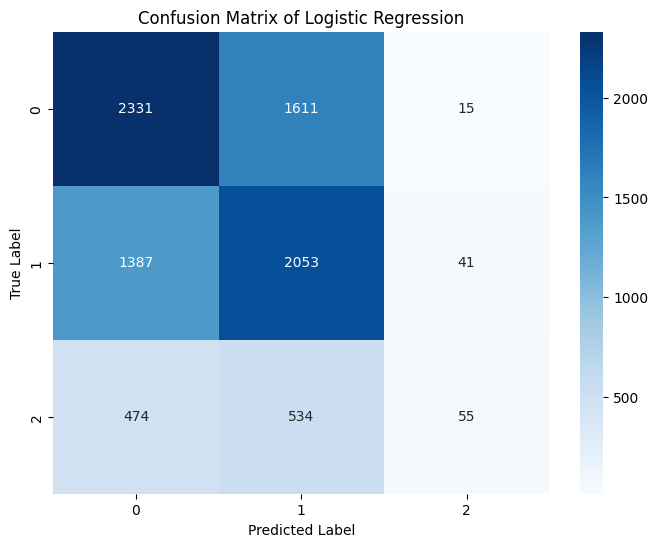

Precision: 0.52
Recall: 0.52


In [13]:
# Generate confusion matrix for Logistic Regression
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=logreg.classes_, 
            yticklabels=logreg.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()





# Calculate precision
precision = round(precision_score(y_test, logreg_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, logreg_pred, average='weighted'), 2)
print("Recall:", recall)


In [16]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of  K-Nearest Neighbors:", round(knn_accuracy,2),"%")


Accuracy of  K-Nearest Neighbors: 0.89 %


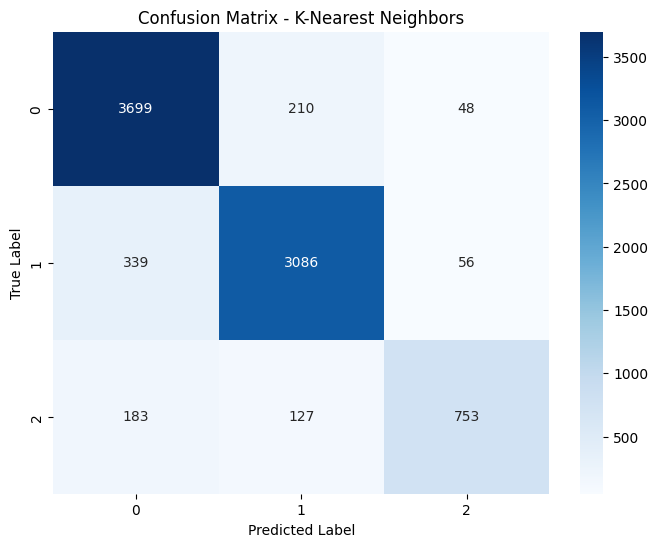

Precision: 0.89
Recall: 0.89


In [17]:
# Generate confusion matrix for KNN
knn_conf_matrix = confusion_matrix(y_test, knn_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

# Calculate precision
precision = round(precision_score(y_test, knn_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, knn_pred, average='weighted'), 2)
print("Recall:", recall)

In [9]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert the target variable to a single class
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the Extra Trees model
et = ExtraTreesClassifier()

# Fit the Extra Trees model
et.fit(X_train_scaled, y_train_encoded)

# Predict on the test set with the Extra Trees model
et_pred = et.predict(X_test_scaled)

# Calculate accuracy with the Extra Trees model
et_accuracy = accuracy_score(y_test_encoded, et_pred)

print("Accuracy of  Extra Trees model:", round(et_accuracy,3),"%")

Accuracy of  Extra Trees model: 0.901 %


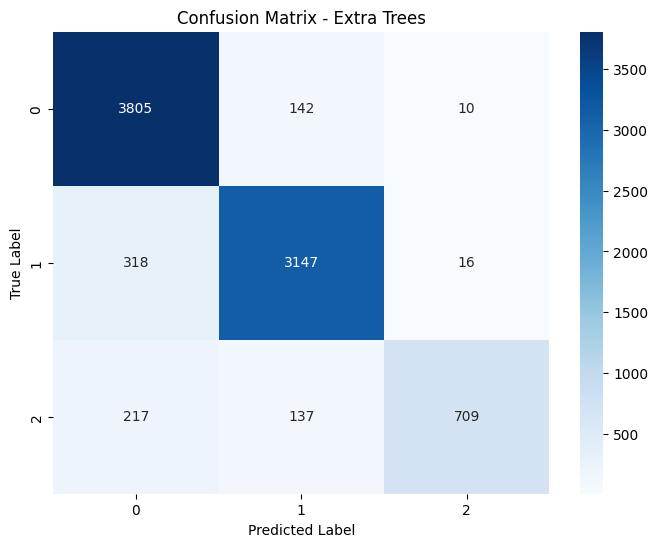

Precision: 0.905
Recall: 0.901


In [33]:
# Generate confusion matrix for Extra Trees
et_conf_matrix = confusion_matrix(y_test_encoded, et_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(et_conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Extra Trees')
plt.show()


# Calculate precision
precision = round(precision_score(y_test, et_pred, average='weighted'), 3)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, et_pred, average='weighted'), 3)
print("Recall:", recall)

In [23]:
import xgboost as xgb

# Initialize XGBoost model with default hyperparameters
xgb_model = xgb.XGBClassifier()  # Specify GPU acceleration

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy of XGBoost:", round(xgb_accuracy, 2))

Accuracy of XGBoost: 0.85


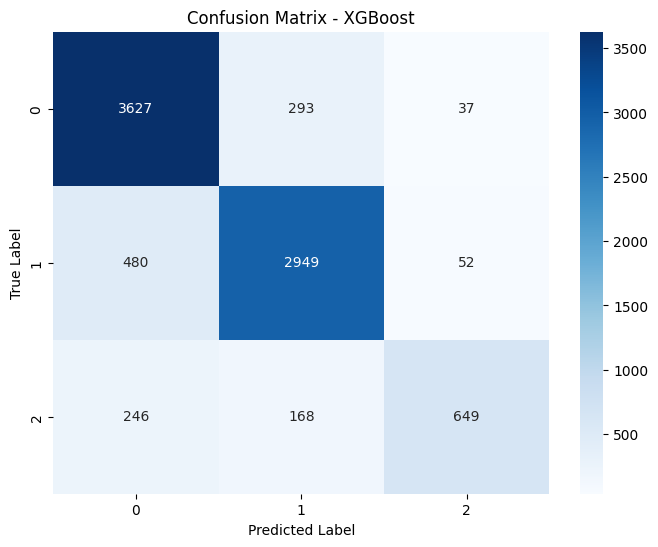

Precision: 0.85
Recall: 0.85


In [27]:

# Generate confusion matrix for xgb_model
xgb_conf_matrix = confusion_matrix(y_test, xgb_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Calculate precision
precision = round(precision_score(y_test, xgb_pred, average='weighted'), 2)
print("Precision:", precision)

# Calculate recall
recall = round(recall_score(y_test, xgb_pred, average='weighted'), 2)
print("Recall:", recall)